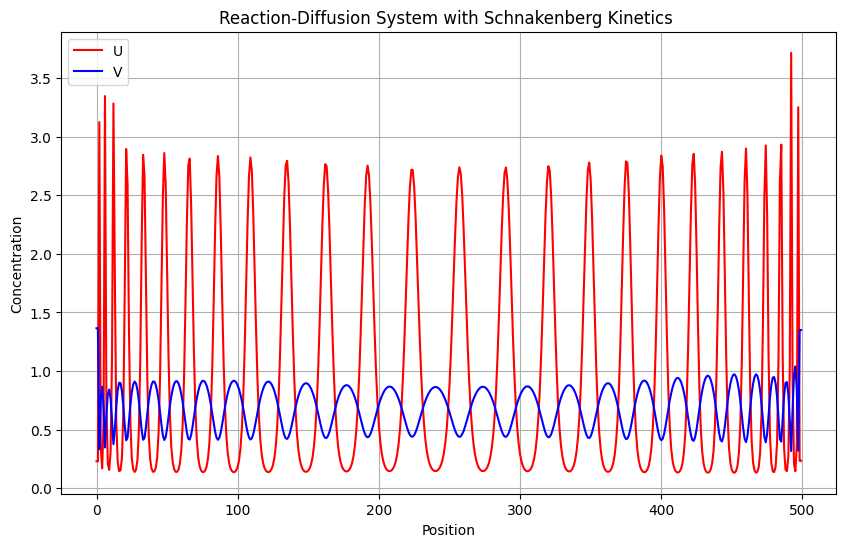

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# D2 = 40.0
a = 0.1
b = 0.9
size = 500

T = 200.0
dt = 0.001
dx = (dt / 0.005) ** 0.5
n = int(T / dt)

def laplacian1D(Z):
    Zleft = np.roll(Z, 1)
    Zright = np.roll(Z, -1)
    laplacian = (Zleft + Zright - 2 * Z) / (dx ** 2)
    laplacian[0] = 0
    laplacian[-1] = 0
    return laplacian

def custom_function_D1(x, L):
    return np.where(x < L / 2, 2 * x / L, 2 - 2 * x / L)
def custom_function_D2(x, L):
    return np.where(x < L / 2, 80 * x / L, 80 - 80 * x / L)

# Define the spatial grid
L = 1  # Define the value of L
x = np.linspace(0, L, size)

U = np.random.rand(size)
V = np.random.rand(size)

for i in range(n):
    deltaU = laplacian1D(U)
    deltaV = laplacian1D(V)

    Uc = U[:]
    Vc = V[:]

    # Update D1 using the specified function
    D1 = custom_function_D1(x, L)
    D2 = custom_function_D2(x, L)

    U, V = \
        Uc + dt * (D1 * deltaU + a - Uc + Uc ** 2 * Vc), \
        Vc + dt * (D2 * deltaV + b - Uc ** 2 * Vc)
    U[0] = U[1]
    U[-1] = U[-2]
    V[0] = V[1]
    V[-1] = V[-2]
plt.figure(figsize=(10, 6))
plt.plot(U, label='U', color='r')
plt.plot(V, label='V', color='b')
plt.xlabel('Position')
plt.ylabel('Concentration')
plt.title('Reaction-Diffusion System with Schnakenberg Kinetics ')
plt.legend()
plt.grid(True)
plt.show()
